In [19]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

(<Axes: >, <matplotlib.image.AxesImage at 0x7c3364a61d50>)

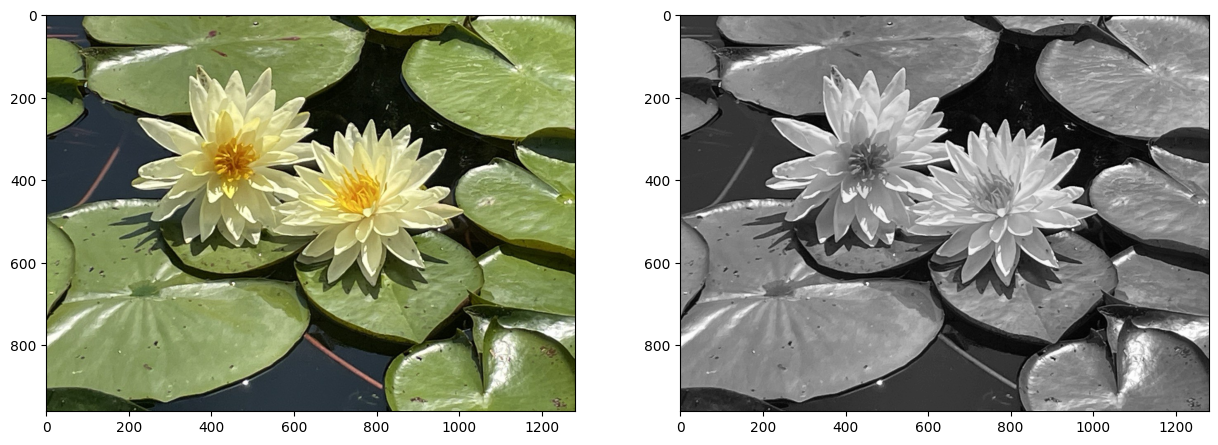

In [25]:
img = cv2.imread('504.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)/255
rows, cols = gray.shape

# Let's plot the image
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(gray, cmap='gray')

(<Axes: >, <matplotlib.image.AxesImage at 0x7c3353427df0>)

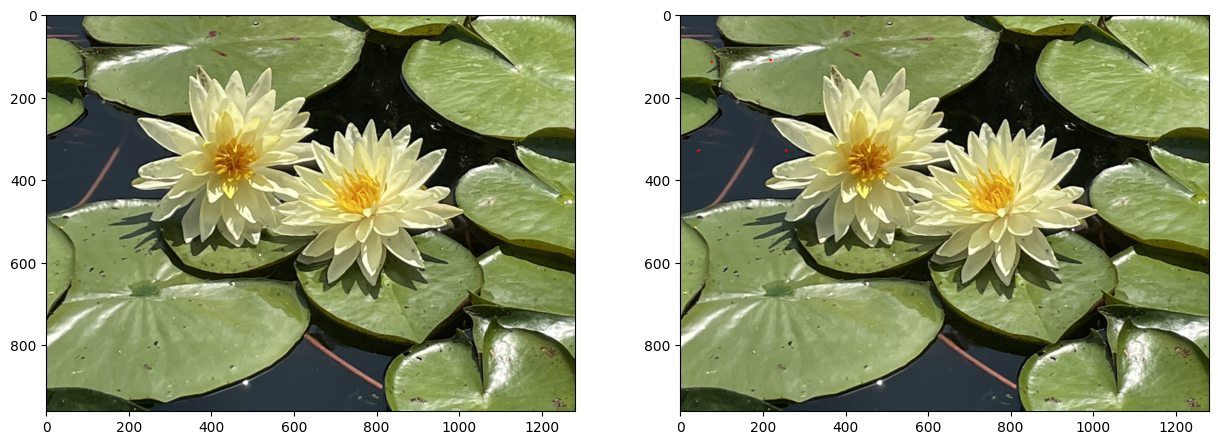

In [26]:
# Let's plot the points
out = np.copy(img)
out = cv2.circle(out, tuple(top_left), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(top_right), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(bottom_left), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(bottom_right), 3, (255,0,0), -1)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(out)

In [28]:
img_height, img_width, _ = img.shape

print("Image width:", img_width)
print("Image height:", img_height)

Image width: 1280
Image height: 960


In [35]:
# Document Rectification
import numpy as np

# corner coordinates
top_left = [76, 115]
top_right = [219, 111]
bottom_left = [43, 330]
bottom_right = [256, 329]

# Define the matrix of source points corresponding to the 4 document corners
src = np.array([top_left, top_right, bottom_left, bottom_right], dtype=np.float32)

# image dimensions
image_width = 1280
image_height = 960

# Define the matrix of target (destination) points corresponding to the 4 image corners
dst = np.array([[0, 0],                 # Top-left corner
[image_width - 1, 0],                   # Top-right corner
[image_width - 1, image_height - 1],    # Bottom-right corner
[0, image_height - 1]],                 # Bottom-left corner
dtype=np.float32)



(<Axes: >, <matplotlib.image.AxesImage at 0x7c3352f76710>)

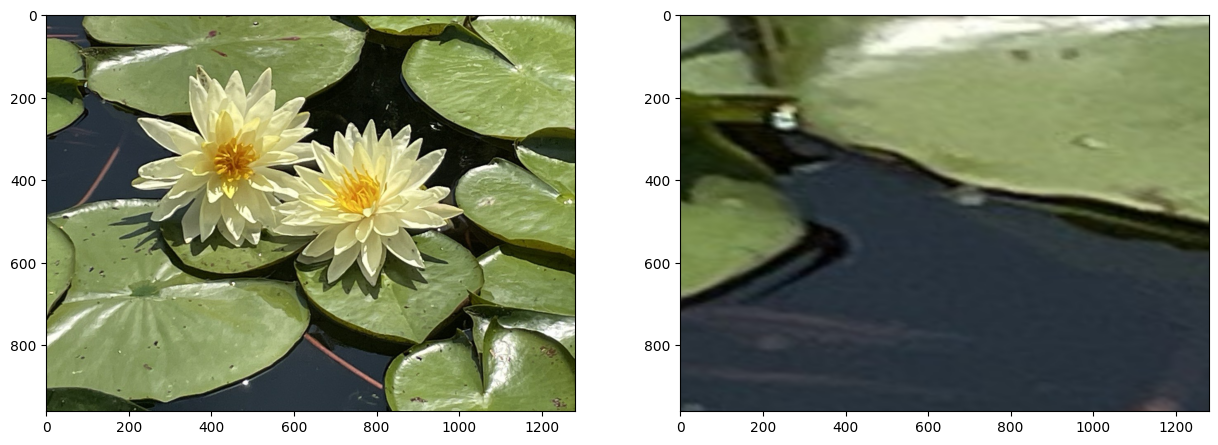

In [42]:
# Affine transformation

# Define the matrix of source points corresponding to the first 3 document corners
src = np.array([top_left, top_right, bottom_left], dtype=np.float32)

# Define the matrix of target (destination) points corresponding to the first 3 image corners
dst = np.array([[0, 0],  # Top-left corner
[image_width - 1, 0],    # Top-right corner
[0, image_height - 1]],  # Bottom-left corner
dtype=np.float32)

# Affine transform matrix
AF = cv2.getAffineTransform(src[:3], dst[:3])

# Build the rectified image using the computed matrix
rectified = cv2.warpAffine(img, AF, (image_width, image_height))

# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified)


(<Axes: >, <matplotlib.image.AxesImage at 0x7c33532d9e70>)

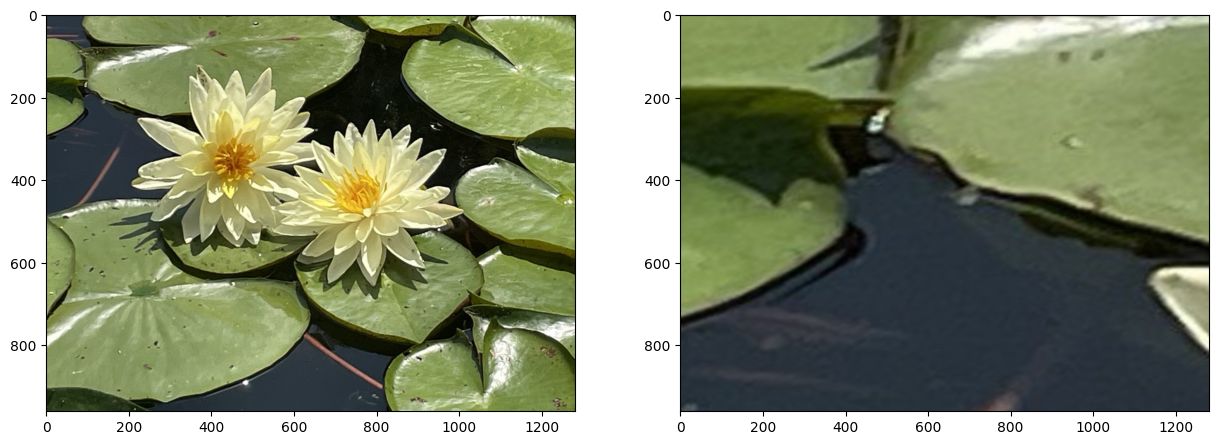

In [47]:
# Matrix of source points corresponding to the last 3 document corners
src_last3 = np.array([top_right, bottom_left, bottom_right], dtype=np.float32)

# Matrix of target (destination) points corresponding to the last 3 image corners
dst_last3 = np.array([[image_width - 1, 0],    # Top-right corner
[0, image_height - 1],                        # Bottom-left corner
[image_width - 1, image_height - 1]],         # Bottom-right corner
dtype=np.float32)

# Compute the affine transform matrix
ATM_last3 = cv2.getAffineTransform(src_last3, dst_last3)

# Build the rectified image using the computed matrix
rectified_last3 = cv2.warpAffine(img, ATM_last3, (image_width, image_height))

# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified_last3)


(<Axes: >, <matplotlib.image.AxesImage at 0x7c3364d38f10>)

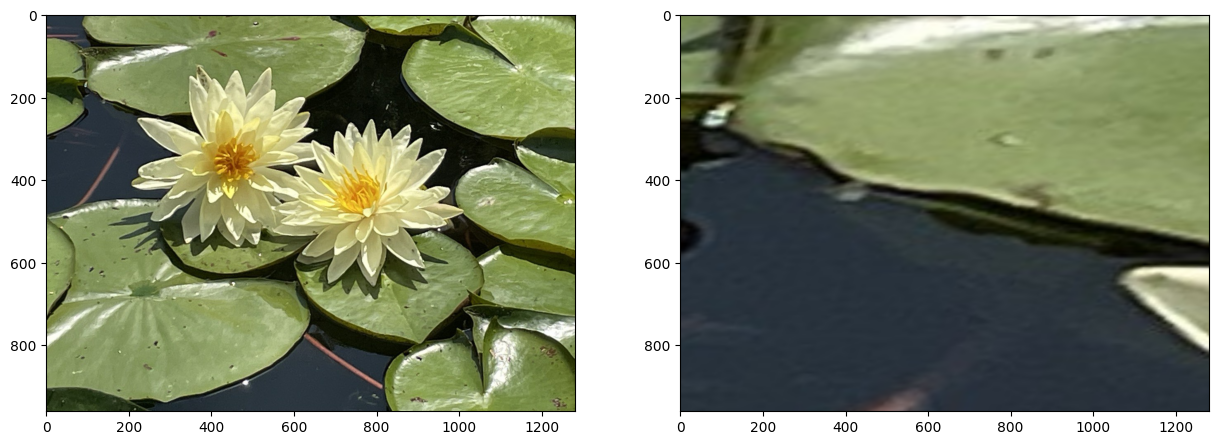

In [48]:
# Matrix of source points corresponding to all 4 document corners
src_all = np.array([top_left, top_right, bottom_left, bottom_right], dtype=np.float32)

# Define the matrix of target (destination) points corresponding to all 4 image corners
dst_all = np.array([[0, 0],           # Top-left corner
[image_width - 1, 0],                 # Top-right corner
[0, image_height - 1],                # Bottom-left corner
[image_width - 1, image_height - 1]],  # Bottom-right corner
                   dtype=np.float32)

# Estimate the optimal affine transform matrix
ATM2, inliers = cv2.estimateAffine2D(src_all, dst_all)

# Build the rectified image using the computed matrix
rectified2 = cv2.warpAffine(img, ATM2, (image_width, image_height))

# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified2)


(<Axes: >, <matplotlib.image.AxesImage at 0x7c336407c9a0>)

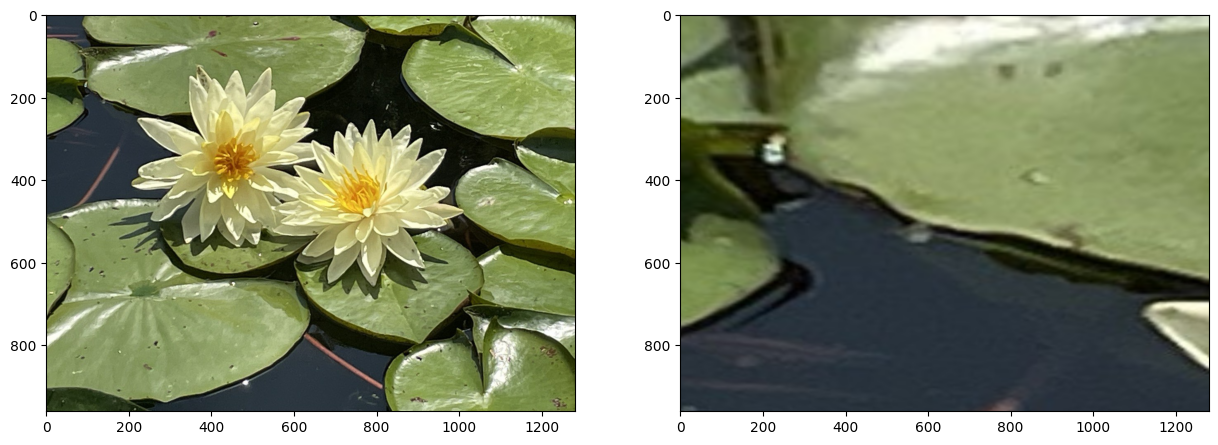

In [50]:
# Matrix of source points corresponding to all 4 document corners
src_all = np.array([top_left, top_right, bottom_left, bottom_right], dtype=np.float32)

# Define the matrix of target (destination) points corresponding to all 4 image corners
dst_all = np.array([[0, 0],            # Top-left corner
[image_width - 1, 0],                  # Top-right corner
[0, image_height - 1],                 # Bottom-left corner
[image_width - 1, image_height - 1]],  # Bottom-right corner
dtype=np.float32)

# Compute the homography matrix
HM = cv2.getPerspectiveTransform(src_all, dst_all)

# Build the rectified image using the computed matrix
rectified3 = cv2.warpPerspective(img, HM, (image_width, image_height))

# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rectified3)
